In [53]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [54]:
from google.colab import files
uploaded = files.upload()

Saving ETH.csv to ETH (1).csv


In [55]:
df = pd.read_csv('ETH.csv')
df.head(6)

,id,open,close,high,low,volume,Day,Month,Year
0,0,3952.1,3927.2,3973.2,3882.50,50207.34,6,9,2021
1,1,3885.3,3952.1,3982.0,3833.80,39134.52,5,9,2021
2,2,3938.1,3884.4,3969.8,3835.00,23300.34,4,9,2021
3,3,3787.6,3938.3,4027.9,3710.00,57443.89,3,9,2021
4,4,3826.5,3787.6,3837.0,3723.89,34933.13,2,9,2021
5,5,3431.1,3827.2,3840.9,3383.90,64484.45,1,9,2021


In [56]:
df.shape

(600, 9)

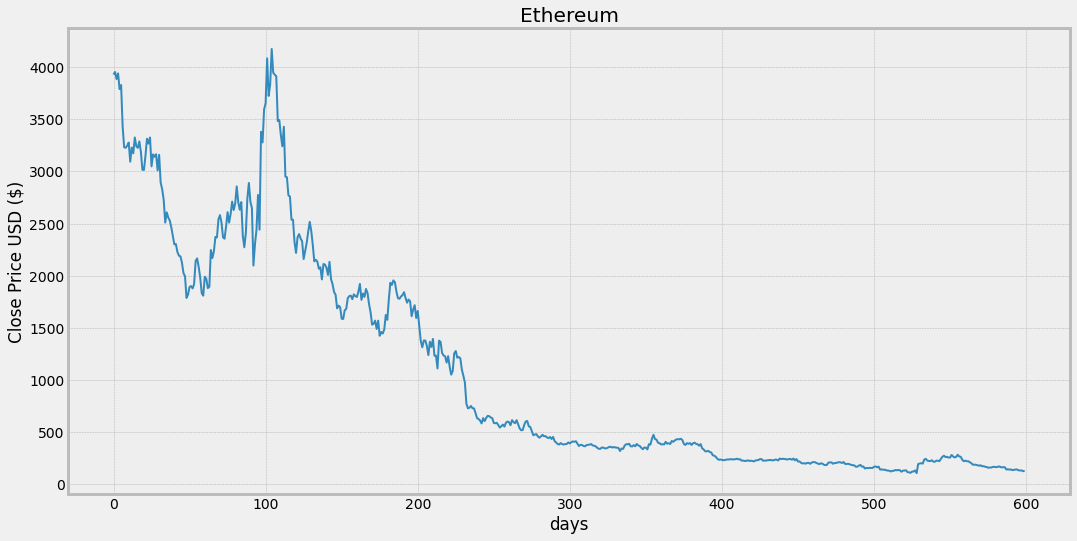

In [57]:
plt.figure(figsize=(16, 8))
plt.title('Ethereum')
plt.xlabel('days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['close'])
plt.show()

In [58]:
df = df[['close']]
df.head(5)

,close
0,3927.2
1,3952.1
2,3884.4
3,3938.3
4,3787.6


In [59]:
future_d = 30

df['Predictions'] = df[['close']].shift(-future_d)
df.tail(6)

,close,Predictions
594,144.18,NaN
595,135.60,NaN
596,134.49,NaN
597,134.83,NaN
598,127.56,NaN
599,130.94,NaN


In [60]:
X = np.array(df.drop(['Predictions'], 1))[:-future_d]
print(X)

[[3927.2 ]
 [3952.1 ]
 [3884.4 ]
 [3938.3 ]
 [3787.6 ]
 [3827.2 ]
 [3431.1 ]
 [3230.88]
 [3225.8 ]
 [3245.8 ]
 [3276.1 ]
 [3092.68]
 [3228.51]
 [3173.2 ]
 [3324.44]
 [3240.7 ]
 [3225.  ]
 [3286.8 ]
 [3186.4 ]
 [3015.4 ]
 [3013.  ]
 [3147.27]
 [3312.4 ]
 [3265.6 ]
 [3324.8 ]
 [3047.8 ]
 [3163.  ]
 [3139.9 ]
 [3164.4 ]
 [3009.2 ]
 [3158.3 ]
 [2892.  ]
 [2829.1 ]
 [2726.1 ]
 [2508.9 ]
 [2607.3 ]
 [2557.3 ]
 [2529.  ]
 [2463.09]
 [2384.2 ]
 [2300.1 ]
 [2304.3 ]
 [2228.7 ]
 [2192.7 ]
 [2185.9 ]
 [2124.5 ]
 [2025.3 ]
 [1995.4 ]
 [1787.8 ]
 [1820.  ]
 [1893.21]
 [1900.86]
 [1878.24]
 [1919.7 ]
 [2142.4 ]
 [2166.1 ]
 [2083.8 ]
 [1983.4 ]
 [1833.3 ]
 [1809.  ]
 [1990.3 ]
 [1970.32]
 [1881.6 ]
 [1892.94]
 [2246.51]
 [2169.1 ]
 [2234.5 ]
 [2372.  ]
 [2366.7 ]
 [2541.6 ]
 [2580.5 ]
 [2508.49]
 [2368.7 ]
 [2354.7 ]
 [2470.7 ]
 [2609.16]
 [2508.63]
 [2591.36]
 [2710.1 ]
 [2629.  ]
 [2692.  ]
 [2855.7 ]
 [2706.  ]
 [2632.8 ]
 [2705.4 ]
 [2382.9 ]
 [2272.7 ]
 [2409.74]
 [2740.9 ]
 [2888.9 ]
 [2707.9 ]

In [61]:
y = np.array(df['Predictions'])[:-future_d]
print(y)

[3158.3  2892.   2829.1  2726.1  2508.9  2607.3  2557.3  2529.   2463.09
 2384.2  2300.1  2304.3  2228.7  2192.7  2185.9  2124.5  2025.3  1995.4
 1787.8  1820.   1893.21 1900.86 1878.24 1919.7  2142.4  2166.1  2083.8
 1983.4  1833.3  1809.   1990.3  1970.32 1881.6  1892.94 2246.51 2169.1
 2234.5  2372.   2366.7  2541.6  2580.5  2508.49 2368.7  2354.7  2470.7
 2609.16 2508.63 2591.36 2710.1  2629.   2692.   2855.7  2706.   2632.8
 2705.4  2382.9  2272.7  2409.74 2740.9  2888.9  2707.9  2647.7  2097.6
 2302.1  2439.8  2773.9  2441.3  3378.6  3277.67 3593.5  3651.9  4082.3
 3722.8  3833.31 4172.7  3945.5  3926.   3911.7  3481.49 3491.4  3348.7
 3240.5  3427.3  2949.7  2943.8  2769.4  2758.6  2536.9  2537.   2322.8
 2218.6  2367.9  2399.3  2356.7  2329.9  2160.   2237.1  2313.6  2422.5
 2516.4  2429.9  2296.7  2138.2  2152.8  2136.1  2067.4  2081.4  1964.9
 2112.1  2107.4  2077.4  2007.6  2133.1  1967.8  1919.3  1843.9  1818.2
 1687.2  1713.9  1698.5  1587.6  1585.8  1669.1  1682.   1784.3

In [62]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [63]:
tree = DecisionTreeRegressor().fit(x_train, y_train)

lr = LinearRegression().fit(x_train, y_train)

In [64]:
x_future = df.drop(['Predictions'], 1)[:-future_d]
x_future = x_future.tail(future_d)
x_future = np.array(x_future)
x_future

array([[218.15],
       [228.43],
       [227.52],
       [224.11],
       [247.36],
       [265.97],
       [275.59],
       [262.14],
       [265.43],
       [257.67],
       [258.56],
       [283.  ],
       [268.16],
       [259.01],
       [264.96],
       [284.97],
       [268.3 ],
       [265.49],
       [237.24],
       [223.14],
       [228.23],
       [222.69],
       [223.11],
       [212.59],
       [203.79],
       [189.06],
       [190.41],
       [188.69],
       [184.07],
       [180.08]])

In [65]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

lr_prediction = lr.predict(x_future)
print(lr_prediction)

[184.62 173.81 175.99 170.14 168.16 160.47 162.71 162.92 167.7  166.86
 166.86 166.84 164.98 169.22 164.03 166.05 164.98 167.7  146.34 140.5
 144.57 137.72 140.5  143.09 144.18 135.6  134.49 134.83 127.56 130.94]

[232.38354127 240.45985289 239.74492647 237.06591649 255.33189365
 269.9525317  277.51032526 266.94355568 269.52828965 263.43177427
 264.13098802 283.33186895 271.67306891 264.48452306 269.15904194
 284.8795668  271.78305759 269.57542766 247.38128337 236.30385207
 240.30272621 235.95031703 236.28028306 228.01541942 221.10184527
 209.52946491 210.59007003 209.23878054 205.60915411 202.47447674]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


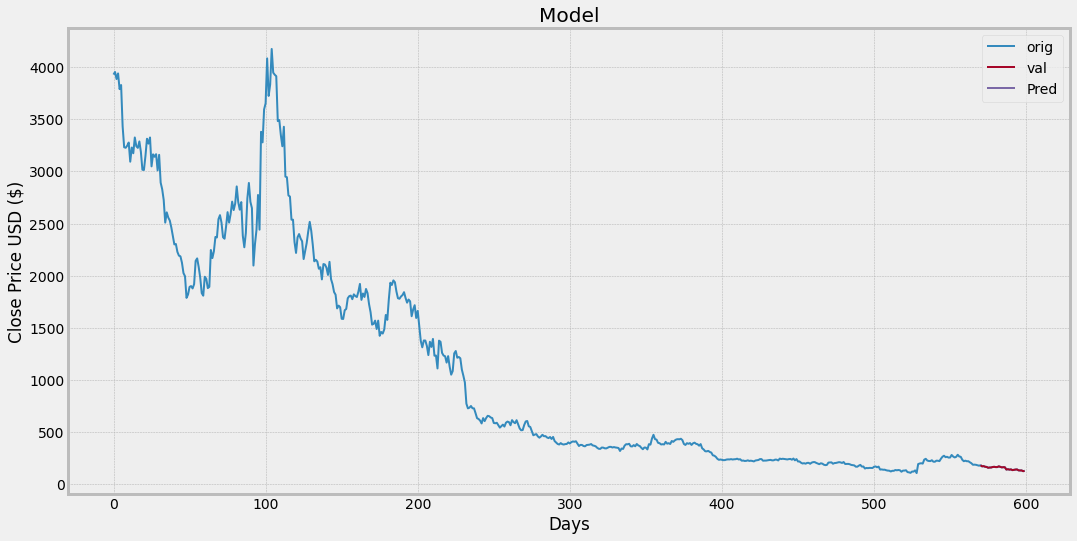

In [66]:
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Preditions'] = predictions
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['orig', 'val', 'Pred'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


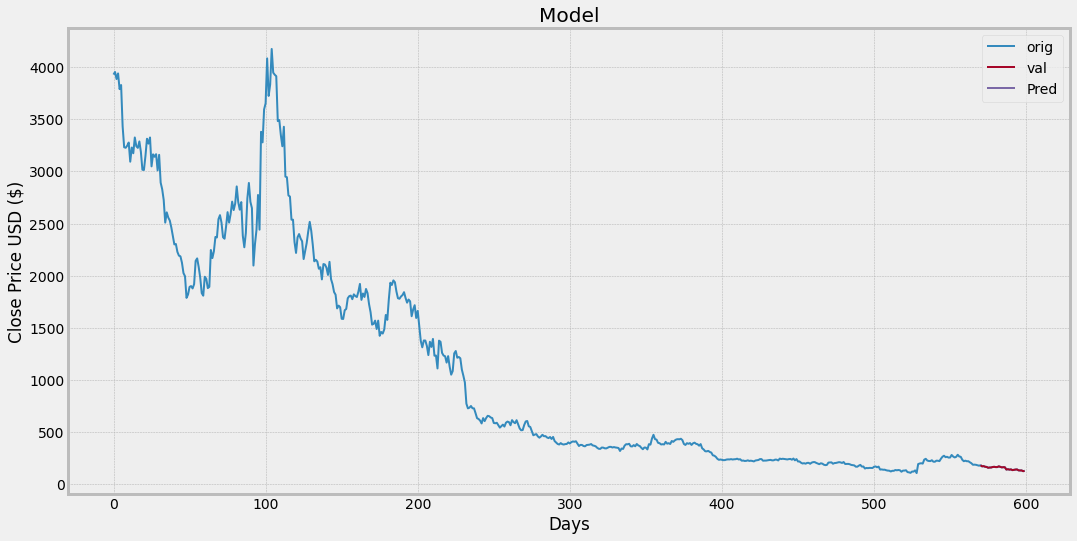

In [67]:
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Preditions'] = predictions
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['orig', 'val', 'Pred'])
plt.show()